<a href="https://colab.research.google.com/github/yadavvinay20306/Assignment-.1/blob/main/main_%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the Libraries

In [1]:
import numpy as np
import pandas as pd

#importing the  dataset


In [2]:
df=pd.read_csv("/content/daily_csv.csv")

#checking the dataset

In [3]:
df.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


#Data preprocessing

#finding the null values amd missing values

In [4]:
df.isnull()

,Date,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5933,False,False
5934,False,False
5935,False,False
5936,False,False


#finding the outliers



IQR=q3-q1 upperBound=q3+1.5IQR lowerBound=q1-1.5IQR

In [7]:
IQR=df['Price'].quantile(0.75)-df['Price'].quantile(0.25)

In [8]:
IQR

2.58

#labeling the data


In [9]:
Lowerbound=df['Price'].quantile(0.25)-(1.5*IQR)
Lowerbound

-1.21

In [12]:
Upperbound=df['Price'].quantile(0.75)+(1.5*IQR)
Upperbound

9.11

<Axes: ylabel='Price'>

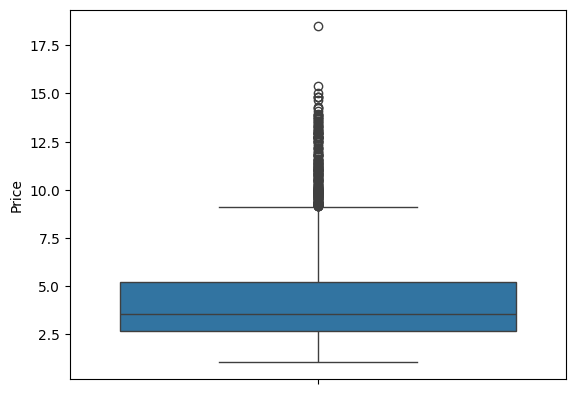

In [15]:
sns.boxplot(df['Price'])

In [16]:
x=df.Date
y=df.Price

#transforming the data

In [17]:

from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()


In [19]:
x=le.fit_transform(x)

In [20]:
y=le.fit_transform(y)

In [21]:
df.Date=le.fit_transform(df.Date)
df.price=le.fit_transform(df.Price)

<ipython-input-21-d64467711321>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.price=le.fit_transform(df.Price)


In [22]:
df

,Date,Price
0,0,3.82
1,1,3.80
2,2,3.61
3,3,3.92
4,4,4.00
...,...,...
5933,5933,2.23
5934,5934,2.26
5935,5935,2.15
5936,5936,2.18


#Data Visualisation

[link text](https://)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

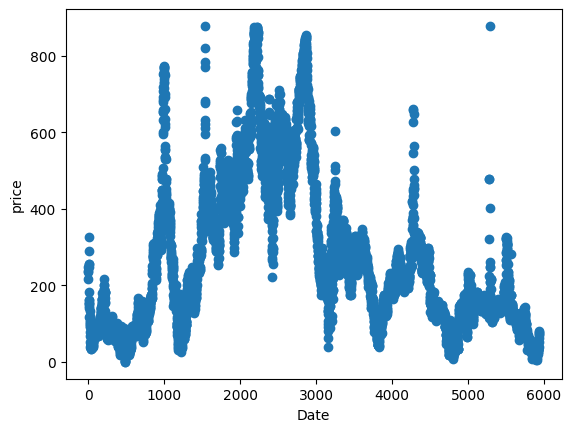

In [24]:
plt.scatter(x,y)
plt.xlabel("Date")
plt.ylabel("price")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

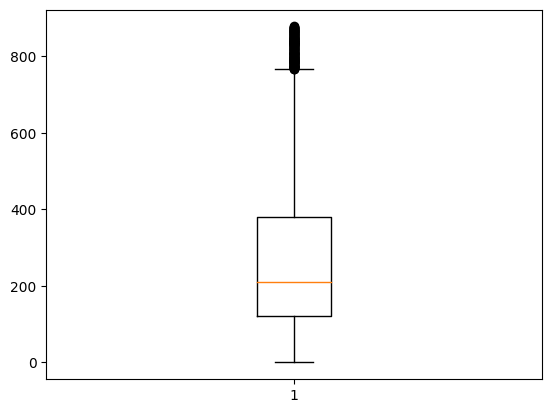

In [25]:
plt.boxplot(y)
plt.show

<Axes: >

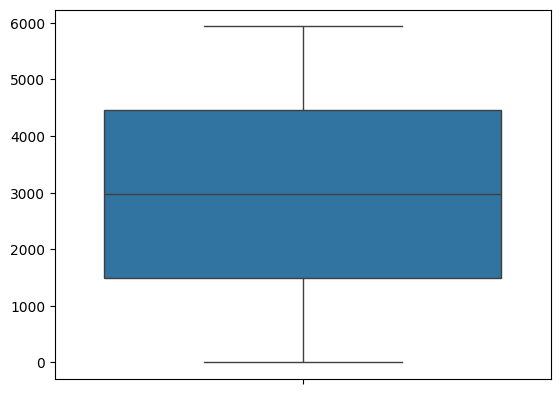

In [28]:
sns.boxplot(x)

<Axes: >

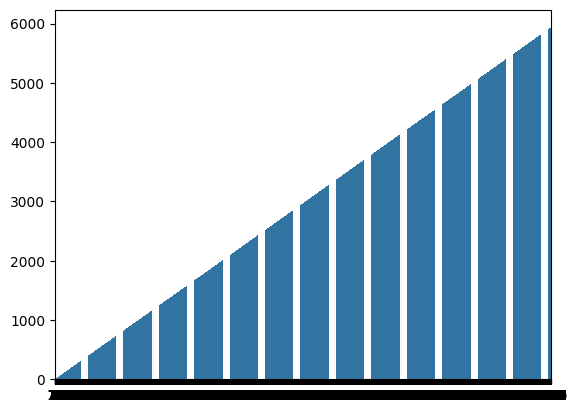

In [29]:
sns.barplot(x)

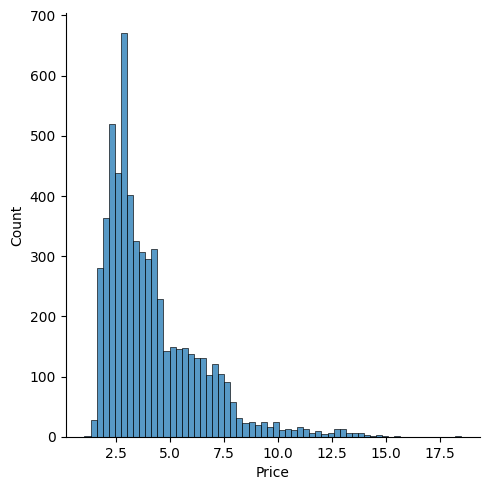

In [30]:
sns.displot(df.Price)

#splitting the data for training and testing

In [31]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30,random_state=30)


x_train.shape
y_train.shape

(5908,)

In [32]:
x_test.shape
y_test.shape

(30,)

In [33]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(5908, 1)
(30, 1)
(5908, 1)
(30, 1)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=30)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

<ipython-input-38-da764feb4af0>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Mean Squared Error: 65.93349000000002
R-squared: 0.997373086328483


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=30),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2)

grid_search.fit(x_train, y_train.ravel())
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred_tuned = best_model.predict(x_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R-squared:", r2_tuned)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_dep

In [41]:
# prompt: model with decision tree

from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
model = DecisionTreeRegressor(random_state=30)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 85.9
R-squared: 0.9965775831920423


In [44]:
# prompt: model with gradiant tree boosting

from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the model
model = GradientBoostingRegressor(random_state=30)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=30),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=2)

grid_search.fit(x_train, y_train.ravel())
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred_tuned = best_model.predict(x_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned R-squared:", r2_tuned)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1226.903901036403
R-squared: 0.951117851773505
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END learning_ra